# Dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('projeto.csv')
dataset.head()

,marca,nacionalidade,gênero_alvo,idade_alvo,classe_alvo,faturamento(bilhoes_de_reais),relação_sustentabilidade,lojas_físicas_br,processos_trabalho_escravo,principais_países_fornecedores,reincide_contrato,canal_denuncia,grife_ou_fastfashion
0,Zara,Espanha,Homens e mulheres,"Jovem, adulto",B,104,Não é boa o suficiente,49,Sim,Portugal,Sim,Sim,Fast Fashion
1,C&A,Países baixos,Homens e mulheres,Jovem,C,"4,55",Boa,278,Não,Brasil,Sim,Sim,Fast Fashion
2,Shein,China,Mulheres,Jovem,C,75,Muito ruim,1,Sim,China,Não,Não,Fast Fashion
3,Fashion Nova,EUA,Mulheres,Jovem,C,"0,0022",Muito ruim,0,Sim,EUA,Não,Não,Fast Fashion
4,Renner,Brasil,Homens e mulheres,"Jovem, adulto",C,"9,5",Boa,600,Sim,Brasil,Sim,Sim,Fast Fashion


# Import

In [3]:
import matplotlib.pyplot as plt
cor = plt.cm.get_cmap('GnBu')

# Fast Fashion e Grife

- Gráfico de (?)
- Classificar se é fast fashion ou grife

In [4]:
dataset['grife_ou_fastfashion'].value_counts()

Fast Fashion    42
Grife            8
Name: grife_ou_fastfashion, dtype: int64

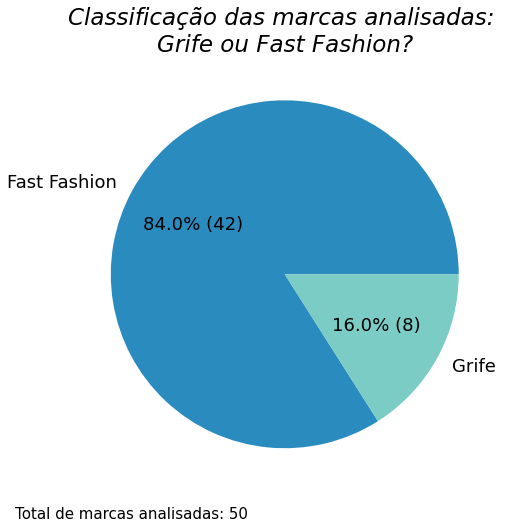

In [5]:
plt.rcParams.update({'axes.facecolor':'white'})
grife_ou_fastfashion_values = dataset['grife_ou_fastfashion'].value_counts().values # pegando os dados numéricos
dataset.grife_ou_fastfashion.value_counts().plot.pie( # definindo o tipo de gráfico e pegando os dados escritos e numéricos do dataset
	  autopct = lambda p: f'{p:.1f}% ({(p/100)*grife_ou_fastfashion_values.sum():n})', # mostra a porcentagem e a quantidade de marcas
	  fontsize = 18, # tamanho da fonte
	  figsize = (8,8), # tamanho da figura
    colors = [cor(0.75), cor(0.50), cor(0.95)] # cor do gráfico
)

plt.ylabel(None)
plt.title("Classificação das marcas analisadas: \nGrife ou Fast Fashion?", fontsize = "23", style='italic') # definindo as configurações do título
plt.text(-1.55,-1.4,'Total de marcas analisadas: 50', fontsize=15) # definindo a descrição
# plt.savefig("Classificação.png", dpi = 400)
plt.show()

# Nacionalidade

- Gráfico de linha
- País, quantas lojas, ...

In [6]:
dataset['nacionalidade'].value_counts()

Brasil           21
EUA               9
Itália            4
França            3
Suécia            2
Inglaterra        2
Alemanha          2
Australia         2
Espanha           1
Países baixos     1
China             1
Japão             1
Camboja           1
Name: nacionalidade, dtype: int64

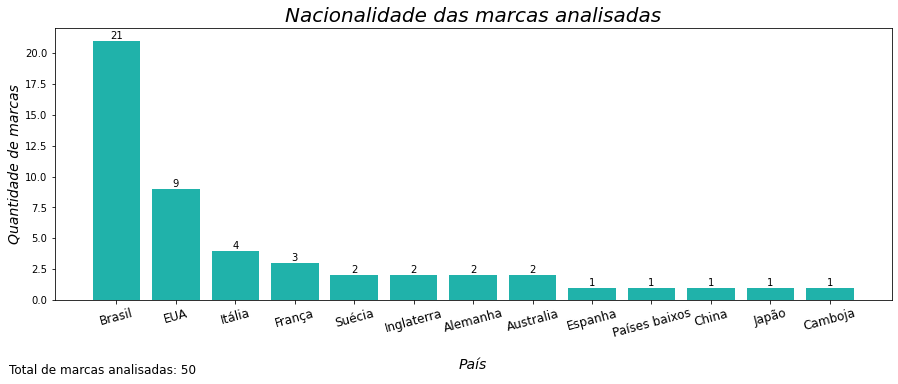

In [7]:
fig, ax = plt.subplots(figsize=(15,5), facecolor = 'white') # definindo o gráfico
def addlabels(x,quantidade): # para adicionar a quantidade exata em cada barra
    for i in range(len(x)):
        plt.text(i,quantidade[i],quantidade[i], ha = "center", va = "bottom")
país = dataset['nacionalidade'].value_counts().index # definindo o país
quantidade = dataset['nacionalidade'].value_counts().values # definindo a quantidade de marcas de cada país
ax.bar(país, quantidade, color ="lightseagreen") # definindo as configurações do gráfico
ax.set_xlabel('País', fontsize = "14", style = "italic", labelpad=18) # nome e configurações do eixo x
plt.xticks(rotation = 15, fontsize = 12)
ax.set_ylabel('Quantidade de marcas', fontsize = "14", style = "italic") # nome e configursções do eixo y
ax.set_title('Nacionalidade das marcas analisadas', fontsize = "20", style = "italic", loc = "center") # configurações do título
plt.text(-1.8,-6,'Total de marcas analisadas: 50', fontsize=12) # definindo a descrição
addlabels(país, quantidade)  
plt.show()

# Gênero do público alvo

- Gráfico de pizza ou barra
- Não informado, mulheres, homens e mulheres e homens

In [8]:
dataset['gênero_alvo'].value_counts()

Homens e mulheres    30
Mulheres             20
Name: gênero_alvo, dtype: int64

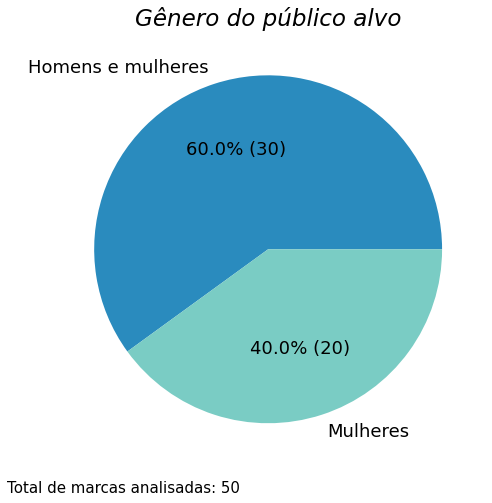

In [9]:
plt.rcParams.update({'axes.facecolor':'white'})
gênero_alvo_values = dataset['gênero_alvo'].value_counts().values
dataset.gênero_alvo.value_counts().plot.pie(
	  autopct = lambda p: f'{p:.1f}% ({(p/100)*gênero_alvo_values.sum():n})',
	  fontsize = 18,
	  figsize = (8,8),
    colors = [cor(0.75), cor(0.50), cor(0.95)]
)
plt.ylabel(None)
plt.title("Gênero do público alvo", fontsize = "23", style='italic')
plt.text(-1.5,-1.4,'Total de marcas analisadas: 50', fontsize=15)
# plt.savefig("Gênero.png",dpi=400)
plt.show()

# Idade do público alvo

- Gráfico de pizza
- "Infantil", "Jovem Adulto", "Jovem, Adulto", "Infantil, Jovem, Adulto"

In [10]:
dataset['idade_alvo'].value_counts()

Jovem                      17
Infantil, jovem, adulto    13
Jovem, adulto              12
Adulto                      7
Infantil                    1
Name: idade_alvo, dtype: int64

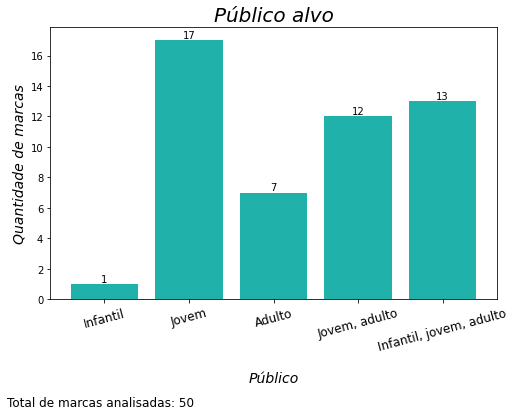

In [11]:
fig, ax = plt.subplots(figsize=(8,5), facecolor = 'white')
def addlabels(x,quantidade):
    for i in range(len(x)):
        plt.text(i,quantidade[i],quantidade[i], ha = "center", va = 'bottom')
público_alvo = ['Infantil', 'Jovem', 'Adulto', 'Jovem, adulto', 'Infantil, jovem, adulto']
quantidade = [1, 17, 7, 12, 13]
ax.bar(público_alvo, quantidade, color ="lightseagreen")
ax.set_xlabel('Público', fontsize = "14", style = "italic", labelpad=18)
ax.set_ylabel('Quantidade de marcas', fontsize = "14", style = "italic")
plt.xticks(rotation = 15, fontsize = 12)
ax.set_title('Público alvo', fontsize = "20", style = "italic", loc = "center")
plt.text(-1.15,-7,'Total de marcas analisadas: 50', fontsize=12)
addlabels(público_alvo, quantidade) 
plt.show()

# Classe alvo

- Gráfico de barra
- AA, A, B, C, D

In [12]:
dataset['classe_alvo'].value_counts()

A     21
B     14
AA     8
C      6
D      1
Name: classe_alvo, dtype: int64

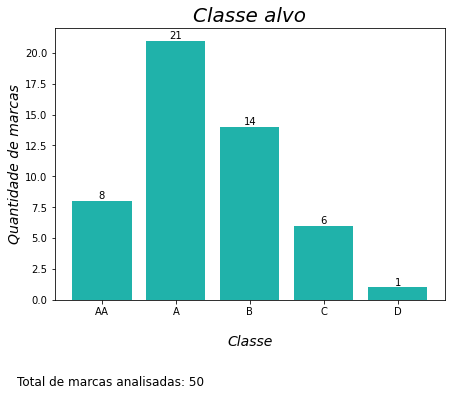

In [13]:
fig, ax = plt.subplots(figsize=(7,5), facecolor = 'white')
def addlabels(x,quantidade):
    for i in range(len(x)):
        plt.text(i,quantidade[i],quantidade[i], ha = "center", va = 'bottom')
classe = ["AA", "A", "B", "C", "D"]
quantidade = [8, 21, 14, 6, 1]
ax.bar(classe, quantidade, color ="lightseagreen")
ax.set_xlabel('Classe', fontsize = "14", style = "italic", labelpad=18)
ax.set_ylabel('Quantidade de marcas', fontsize = "14", style = "italic")
ax.set_title('Classe alvo', fontsize = "20", style = "italic", loc = "center")
plt.text(-1.15,-7,'Total de marcas analisadas: 50', fontsize=12)
addlabels(classe, quantidade) 
plt.show()

# Principais países fornecedores

- Gráfico de barra
- 5 primeiros países

In [14]:
dataset['principais_países_fornecedores'].value_counts()

Brasil        15
China          9
França         4
Itália         3
S/I            3
Inglaterra     2
Australia      2
Portugal       1
Cambodia       1
Vietnã         1
Austrália      1
Suiça          1
Spain          1
Lituania       1
Ásia           1
Londres        1
Italia         1
EUA            1
Índia          1
Name: principais_países_fornecedores, dtype: int64

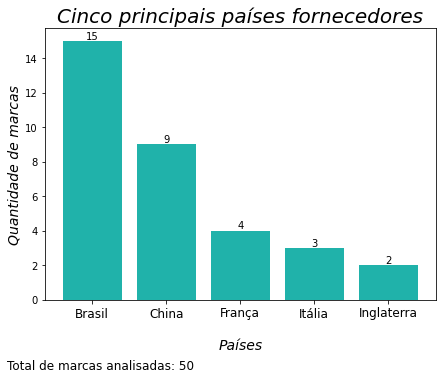

In [15]:
fig, ax = plt.subplots(figsize=(7,5), facecolor = 'white')
def addlabels(x,quantidade):
    for i in range(len(x)):
        plt.text(i,quantidade[i],quantidade[i], ha = "center", va = 'bottom')
países = ["Brasil", "China", "França", "Itália", "Inglaterra"]
quantidade = [15, 9, 4, 3, 2]
ax.bar(países, quantidade, color ="lightseagreen")
ax.set_xlabel('Países', fontsize = "14", style = "italic", labelpad=18)
plt.xticks(fontsize = 12)
ax.set_ylabel('Quantidade de marcas', fontsize = "14", style = "italic")
ax.set_title('Cinco principais países fornecedores', fontsize = "20", style = "italic", loc = "center")
plt.text(-1.15,-4,'Total de marcas analisadas: 50', fontsize=12)
addlabels(países, quantidade)
plt.show()

# Rescinde contrato?

- Gráfico de pizza
- SIM ou NÃO

In [16]:
dataset['reincide_contrato'].value_counts()

Sim    32
Não    15
S/I     3
Name: reincide_contrato, dtype: int64

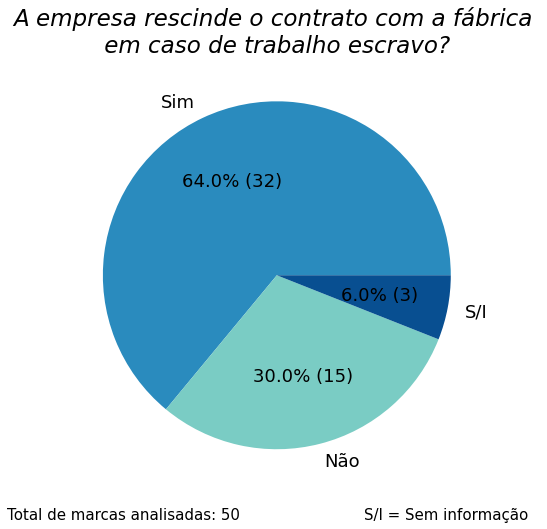

In [17]:
plt.rcParams.update({'axes.facecolor':'white'})
reincide_contrato_values = dataset['reincide_contrato'].value_counts().values
dataset.reincide_contrato.value_counts().plot.pie(
	autopct = lambda p: f'{p:.1f}% ({(p/100)*reincide_contrato_values.sum():n})',
	fontsize = 18,
	figsize = (8,8),
  colors = [cor(0.75), cor(0.50), cor(0.95)]
)

plt.ylabel(None)
plt.title("A empresa rescinde o contrato com a fábrica \n em caso de trabalho escravo? ", fontsize = "23", style='italic')
plt.text(-1.55,-1.4,'Total de marcas analisadas: 50', fontsize=15)
plt.text(0.5,-1.4,'S/I = Sem informação', fontsize=15)
# plt.savefig("Rescinde contrato.png",dpi=400)
plt.show()

# Tem canal de denúncia?

- Gráfico de pizza
- SIM ou NÃO

In [18]:
dataset['canal_denuncia'].value_counts()

Não    27
Sim    20
S/I     3
Name: canal_denuncia, dtype: int64

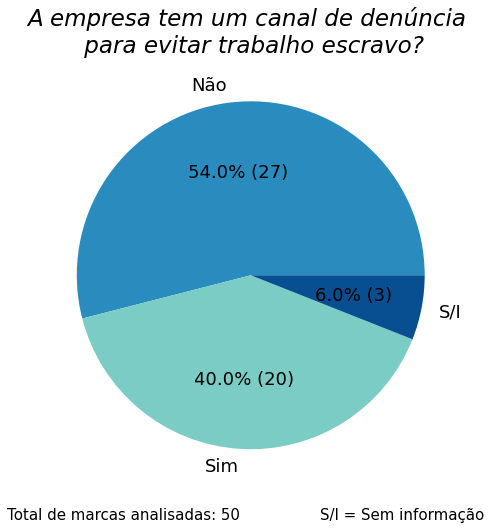

In [19]:
plt.rcParams.update({'axes.facecolor':'white'})
canal_denuncia_values = dataset['gênero_alvo'].value_counts().values
dataset.canal_denuncia.value_counts().plot.pie(
	autopct = lambda p: f'{p:.1f}% ({(p/100)*canal_denuncia_values.sum():n})',
	fontsize = 18,
	figsize = (8,8),
  colors = [cor(0.75), cor(0.50), cor(0.95)]
)
plt.ylabel(None)
plt.title("A empresa tem um canal de denúncia \n para evitar trabalho escravo?", fontsize = "23", style='italic')
plt.text(-1.4,-1.4,'Total de marcas analisadas: 50', fontsize=15)
plt.text(0.4,-1.4,'S/I = Sem informação', fontsize=15)
# plt.savefig("Canal de denúncia.png",dpi=400)
plt.show()

# Relação com a sustentabilidade

- Gráfico de (?)
- "Não é boa", "é um começo",...

In [20]:
 dataset['relação_sustentabilidade'].value_counts()

Boa                       11
É um começo               11
Ótima                     11
Não é boa o suficiente    10
Muito ruim                 4
S/I                        3
Name: relação_sustentabilidade, dtype: int64

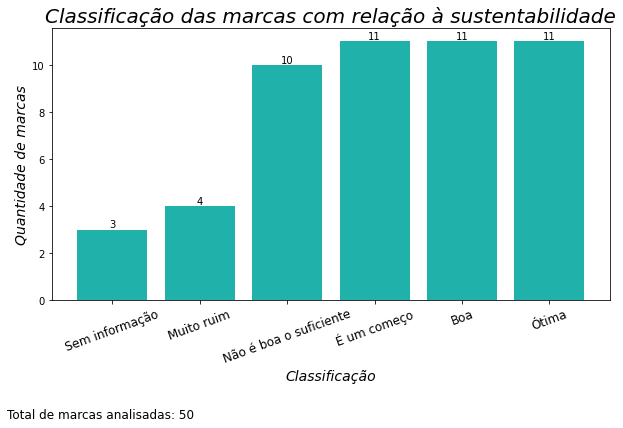

In [21]:
fig, ax = plt.subplots(figsize=(10,5), facecolor = 'white')
def addlabels(x,quantidade):
    for i in range(len(x)):
        plt.text(i,quantidade[i],quantidade[i], ha = "center", va = 'bottom')
classificação = ["Sem informação", "Muito ruim", "Não é boa o suficiente", "É um começo", "Boa", "Ótima"]
# classificação = (dataset ["relação_sustentabilidade"].value_counts().index) 
quantidade = [3, 4, 10, 11, 11, 11]
# quantidade = (dataset ["relação_sustentabilidade"].value_counts().values)
ax.bar(classificação, quantidade, color ="lightseagreen")
plt.xticks(rotation = 20, fontsize = 12)
ax.set_xlabel('Classificação', fontsize = "14", style = "italic")
ax.set_ylabel('Quantidade de marcas', fontsize = "14", style = "italic")
ax.set_title('Classificação das marcas com relação à sustentabilidade', fontsize = "20", style = "italic", loc = "center")
plt.text(-1.2,-5,'Total de marcas analisadas: 50', fontsize=12)
addlabels(classificação, quantidade)
plt.show()

# Processos em relação ao trabalho escravo

- Gráfico de (?)
- SIM ou NÃO

In [22]:
 dataset['processos_trabalho_escravo'].value_counts()

Não    28
Sim    22
Name: processos_trabalho_escravo, dtype: int64

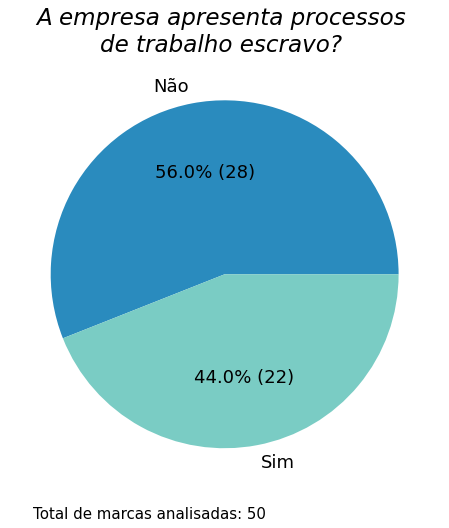

In [23]:
plt.rcParams.update({'axes.facecolor':'white'})
processos_trabalho_escravo_values = dataset['processos_trabalho_escravo'].value_counts().values
dataset.processos_trabalho_escravo.value_counts().plot.pie(
  autopct = lambda p: f'{p:.1f}% ({(p/100)*processos_trabalho_escravo_values.sum():n})',
	fontsize = 18,
	figsize = (8,8),
    colors = [cor(0.75), cor(0.50)]
)
plt.ylabel(None)
plt.title("A empresa apresenta processos \nde trabalho escravo? ", fontsize = "23", style='italic')
plt.text(-1.1,-1.4,'Total de marcas analisadas: 50', fontsize=15)
# plt.savefig("Processos - trabalho escravo.png",dpi=400)
plt.show()

# Raspagem - receita

- Raspagem de dados
- Transformando em dataframe
- Gráfico de linhas

In [24]:
import requests # pega uma página HTML
from bs4 import BeautifulSoup # manipula a página HTML
import pandas as pd # manipulação de tabelas

In [25]:
# definindo a url
url = "https://statinvestor.com/data/3256/revenue-of-the-apparel-market-worldwide-by-country/" 

In [26]:
# dowload da página web (resposta 200 = retorno bem-sucedido)
page = requests.get (url)
page

<Response [200]>

In [27]:
 # definindo um objeto beautiful soup para fazer a raspagem de dados
soup = BeautifulSoup(page.content, 'html.parser')
soup
# prettify transforma a análise em uma string bem formatada, sendo uma linha separada para cada tag e cada string
print(soup.prettify()) 

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <html lang="en">
  <head>
   <title>
    Revenue of the apparel market worldwide by country
   </title>
   <meta content="Revenue of the apparel market worldwide by country in 2017 (Figures expressed in millions of U.S. dollars, unless otherwise specified)" name="description"/>
   <meta charset="utf-8"/>
   <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
   <meta content="width=device-width, initial-scale=1" name="viewport"/>
   <meta content="StatInvestor" name="author"/>
   <script async="" data-ad-client="ca-pub-3341478490071077" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
   </script>
   <link href="/css/v2.min.css" rel="stylesheet"/>
   <script src="/js/highchar

In [28]:
# para localizar o elemento HTML que queremos
tabela = soup.find(class_ = 'table table-bordered company')
tabela

<table class="table table-bordered company">
<tr>
<td class="text-left" style="width: 50%">United States</td>
<td class="text-left" style="width: 50%">328067.01</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">China</td>
<td class="text-left" style="width: 50%">288626.26</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">Japan</td>
<td class="text-left" style="width: 50%">91259.02</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">India</td>
<td class="text-left" style="width: 50%">83440.78</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">United Kingdom</td>
<td class="text-left" style="width: 50%">79753.14</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">Germany</td>
<td class="text-left" style="width: 50%">70599.67</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">Italy</td>
<td class="text-left" style="width: 50%">56354.48</td>
</tr>
<tr>
<td class="text-left" style="width: 50%">France</td>
<td class="text-left" style="width: 50%">40076.91<

In [29]:
print(tabela.prettify())

<table class="table table-bordered company">
 <tr>
  <td class="text-left" style="width: 50%">
   United States
  </td>
  <td class="text-left" style="width: 50%">
   328067.01
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   China
  </td>
  <td class="text-left" style="width: 50%">
   288626.26
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   Japan
  </td>
  <td class="text-left" style="width: 50%">
   91259.02
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   India
  </td>
  <td class="text-left" style="width: 50%">
   83440.78
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   United Kingdom
  </td>
  <td class="text-left" style="width: 50%">
   79753.14
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   Germany
  </td>
  <td class="text-left" style="width: 50%">
   70599.67
  </td>
 </tr>
 <tr>
  <td class="text-left" style="width: 50%">
   Italy
  </td>
  <td class="text-left" style="width: 5

In [30]:
# extraindo o que interessa
país_e_receita_tag = tabela.select(".text-left")
# transformando em lista
país_e_receita = []
for pt in país_e_receita_tag:
    país_e_receita.append(pt.get_text())
país_e_receita

['United States',
 '328067.01',
 'China',
 '288626.26',
 'Japan',
 '91259.02',
 'India',
 '83440.78',
 'United Kingdom',
 '79753.14',
 'Germany',
 '70599.67',
 'Italy',
 '56354.48',
 'France',
 '40076.91',
 'South Korea',
 '26443.11',
 'Canada',
 '25624.19',
 'Spain',
 '22814.95',
 'Indonesia',
 '16654.34',
 'Netherlands',
 '14049.64',
 'Poland',
 '11038.38',
 'Austria',
 '10237.97',
 'Sweden',
 '9338.39',
 'Switzerland',
 '9276.47',
 'Hong Kong',
 '9269.54',
 'Belgium',
 '9025.93',
 'Norway',
 '6543.55',
 'Portugal',
 '6027.82',
 'Malaysia',
 '5280.12',
 'Denmark',
 '4724.2',
 'Finland',
 '4622.95',
 'Thailand',
 '3383.56',
 'Ireland',
 '3263.95',
 'Greece',
 '3140.38',
 'Romania',
 '3022.33',
 'Singapore',
 '2989.42',
 'Czech Republic',
 '2375',
 'Vietnam',
 '2366.34',
 'Philippines',
 '2091.62',
 'Hungary',
 '1689.19',
 'Bulgaria',
 '1649.83',
 'Slovakia',
 '1295.46',
 'Lithuania',
 '1223.66',
 'Slovenia',
 '974.06',
 'Croatia',
 '967.12',
 'Estonia',
 '733.89',
 'Latvia',
 '679.92'

In [31]:
# selecionando apenas as linhas pares, contendo os países
país = país_e_receita[::2]
país

['United States',
 'China',
 'Japan',
 'India',
 'United Kingdom',
 'Germany',
 'Italy',
 'France',
 'South Korea',
 'Canada',
 'Spain',
 'Indonesia',
 'Netherlands',
 'Poland',
 'Austria',
 'Sweden',
 'Switzerland',
 'Hong Kong',
 'Belgium',
 'Norway',
 'Portugal',
 'Malaysia',
 'Denmark',
 'Finland',
 'Thailand',
 'Ireland',
 'Greece',
 'Romania',
 'Singapore',
 'Czech Republic',
 'Vietnam',
 'Philippines',
 'Hungary',
 'Bulgaria',
 'Slovakia',
 'Lithuania',
 'Slovenia',
 'Croatia',
 'Estonia',
 'Latvia']

In [32]:
# selecionando apenas as linhas ímpares, contendo as receitas
receita = país_e_receita[1::2]
receita

['328067.01',
 '288626.26',
 '91259.02',
 '83440.78',
 '79753.14',
 '70599.67',
 '56354.48',
 '40076.91',
 '26443.11',
 '25624.19',
 '22814.95',
 '16654.34',
 '14049.64',
 '11038.38',
 '10237.97',
 '9338.39',
 '9276.47',
 '9269.54',
 '9025.93',
 '6543.55',
 '6027.82',
 '5280.12',
 '4724.2',
 '4622.95',
 '3383.56',
 '3263.95',
 '3140.38',
 '3022.33',
 '2989.42',
 '2375',
 '2366.34',
 '2091.62',
 '1689.19',
 '1649.83',
 '1295.46',
 '1223.66',
 '974.06',
 '967.12',
 '733.89',
 '679.92']

In [33]:
# transformando as listas em uma tabela, informando o país e sua respectiva receita
df_pais_e_receita = pd.DataFrame({
    "País": país,
    "Receita": receita
})
df_pais_e_receita

,País,Receita
0,United States,328067.01
1,China,288626.26
2,Japan,91259.02
3,India,83440.78
4,United Kingdom,79753.14
5,Germany,70599.67
6,Italy,56354.48
7,France,40076.91
8,South Korea,26443.11
9,Canada,25624.19


In [34]:
# transformando a coluna Receita em float
df_pais_e_receita['Receita'] = df_pais_e_receita['Receita'].astype(float)
df_pais_e_receita['País'] = df_pais_e_receita['País'].astype(str)
print (df_pais_e_receita.dtypes)

País        object
Receita    float64
dtype: object


In [35]:
# selecionando apenas os 11 primeiros países
df_pais_X_receita2 = df_pais_e_receita.drop(df_pais_e_receita.index[range(11,40)])
# df_pais_X_receita2['Receita'] = np.log10(df_pais_X_receita2['Receita'])
df_pais_X_receita2

,País,Receita
0,United States,328067.01
1,China,288626.26
2,Japan,91259.02
3,India,83440.78
4,United Kingdom,79753.14
5,Germany,70599.67
6,Italy,56354.48
7,France,40076.91
8,South Korea,26443.11
9,Canada,25624.19


In [36]:
# dividindo os valores por 1000 para uma melhor visualização no gráfico
df_pais_X_receita2['Receita'] = (df_pais_X_receita2['Receita'])/1000
df_pais_X_receita2

,País,Receita
0,United States,328.06701
1,China,288.62626
2,Japan,91.25902
3,India,83.44078
4,United Kingdom,79.75314
5,Germany,70.59967
6,Italy,56.35448
7,France,40.07691
8,South Korea,26.44311
9,Canada,25.62419


In [37]:
# arredondando os valores
df_pais_X_receita2['Receita'] = round(df_pais_X_receita2['Receita'])
df_pais_X_receita2

,País,Receita
0,United States,328.0
1,China,289.0
2,Japan,91.0
3,India,83.0
4,United Kingdom,80.0
5,Germany,71.0
6,Italy,56.0
7,France,40.0
8,South Korea,26.0
9,Canada,26.0


In [38]:
# transformando a coluna Receita em int
df_pais_X_receita2['Receita'] = df_pais_X_receita2['Receita'].astype(int)
df_pais_X_receita2

,País,Receita
0,United States,328
1,China,289
2,Japan,91
3,India,83
4,United Kingdom,80
5,Germany,71
6,Italy,56
7,France,40
8,South Korea,26
9,Canada,26


<function matplotlib.pyplot.show(close=None, block=None)>

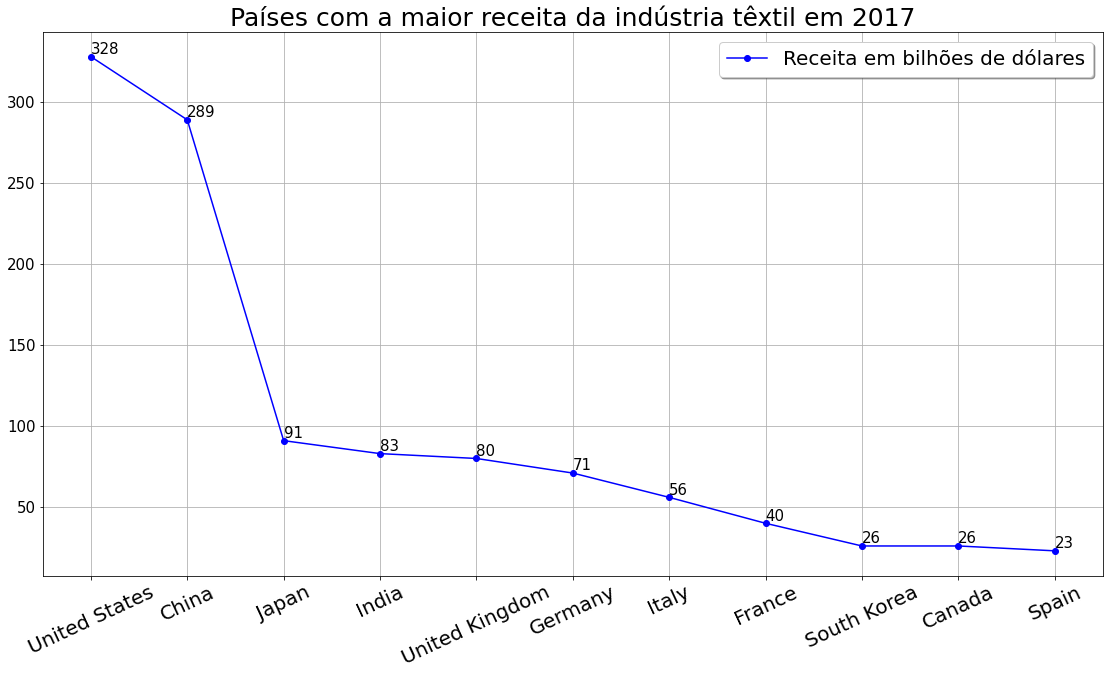

In [39]:
import matplotlib.pyplot as plt
país = df_pais_X_receita2["País"] # pegando os dados da coluna País
receita = df_pais_X_receita2["Receita"] # pegando os dados da coluna Receita
figura = plt.figure(figsize=(19,10)) # definindo o gráfico
def addlabels(x,quantidade): # para mostrar os números específicos
    for i in range(len(x)):
        plt.text(i,receita[i],receita[i], fontsize = 15, va = 'bottom')
plt.plot(país, receita, color = "b", marker = "o") # configurações do gráfico
plt.xticks(rotation = 25, fontsize=20) # configuração do eixo x
plt.yticks( fontsize=15) # configuração do eixo y
plt.title('Países com a maior receita da indústria têxtil em 2017', fontsize= 25) # configurações do título
plt.legend(['Receita em bilhões de dólares'], loc='upper right', shadow=True, fontsize=20) # definindo a legenda
plt.grid(True) # adicionando a grade
addlabels(país, receita)
plt.show